In [1]:
!pip install numpy
!pip install pandas
!pip install keras
!pip install graphviz
!pip install pydot

In [2]:
import numpy as np
np.random.seed(42) # for reproducibility
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
%matplotlib inline  
import app_utils as u
from imp import reload
reload(u);

/Users/mabbas/tf3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
df_train,df_val,categories = u.read_data()

In [4]:
#Load Glove 50-d embeddings
embeddings,word_index = u.load_embeddings()

In [5]:
#Prepare the data for the model
tk_word_index,x_train,y_train,x_val,y_val = u.prepare_data_from_full_word_index(df_train,df_val,categories,word_index)

In [6]:
# Get the embedding matrix for the model, build model, display model summary
embedding_matrix = u.get_embedding_matrix_for_model(embeddings,word_index)
model = u.build_model(embedding_matrix,categories)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 50)            20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                10624     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 20,011,895
Trainable params: 11,845
Non-trainable params: 20,000,050
_________________________________________________________________


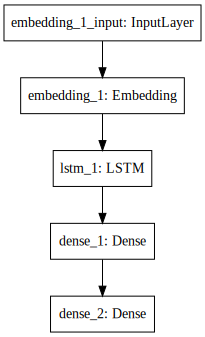

In [7]:
# Display the Model
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [8]:
# Train the model, record history
history = model.fit(x_train, y_train,
                    epochs=200,
                    batch_size=24,
                    shuffle=False,
                    validation_data=(x_val, y_val))

Train on 24 samples, validate on 12 samples
Epoch 1/200
24/24 [==============================] - 1s 25ms/step - loss: 1.6210 - acc: 0.2917 - val_loss: 1.5512 - val_acc: 0.1667
Epoch 2/200
24/24 [==============================] - 0s 490us/step - loss: 1.5557 - acc: 0.2917 - val_loss: 1.5090 - val_acc: 0.5000
Epoch 3/200
24/24 [==============================] - 0s 443us/step - loss: 1.5143 - acc: 0.5417 - val_loss: 1.4790 - val_acc: 0.6667
Epoch 4/200
24/24 [==============================] - 0s 477us/step - loss: 1.4840 - acc: 0.6250 - val_loss: 1.4541 - val_acc: 0.6667
Epoch 5/200
24/24 [==============================] - 0s 432us/step - loss: 1.4591 - acc: 0.6250 - val_loss: 1.4339 - val_acc: 0.7500
Epoch 6/200
24/24 [==============================] - 0s 453us/step - loss: 1.4380 - acc: 0.6667 - val_loss: 1.4168 - val_acc: 0.7500
Epoch 7/200
24/24 [==============================] - 0s 463us/step - loss: 1.4189 - acc: 0.6667 - val_loss: 1.4017 - val_acc: 0.7500
Epoch 8/200
24/24 [=======

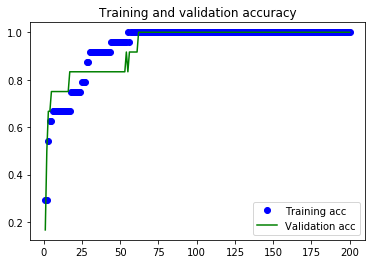

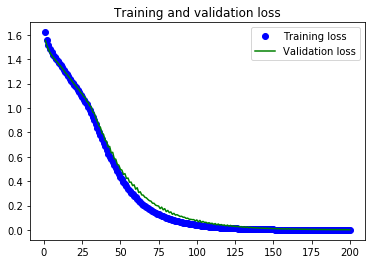

In [9]:
# Make history
u.make_history_plot(history)

In [10]:
# Make and analyze training predictions
train_predictions = u.one_hot_to_category(model.predict(x_train),categories)
u.analyze_predictions(categories,df_train['category'].values,train_predictions)

Overall Accuracy: 1.0
Travel --> Precision:1.0,Recall:1.0,F1:1.0
Computer - Software --> Precision:1.0,Recall:1.0,F1:1.0
Meals and Entertainment --> Precision:1.0,Recall:1.0,F1:1.0
Office Supplies --> Precision:1.0,Recall:1.0,F1:1.0
Computer - Hardware --> Precision:1.0,Recall:1.0,F1:1.0

Averages---> Precision:1.0, Recall:1.0, F1:1.0

Confusion Matrix

Travel(6) --> Travel(6) , Computer - Software(0) , Meals and Entertainment(0) , Office Supplies(0) , Computer - Hardware(0) , 
Computer - Software(4) --> Travel(0) , Computer - Software(4) , Meals and Entertainment(0) , Office Supplies(0) , Computer - Hardware(0) , 
Meals and Entertainment(10) --> Travel(0) , Computer - Software(0) , Meals and Entertainment(10) , Office Supplies(0) , Computer - Hardware(0) , 
Office Supplies(1) --> Travel(0) , Computer - Software(0) , Meals and Entertainment(0) , Office Supplies(1) , Computer - Hardware(0) , 
Computer - Hardware(3) --> Travel(0) , Computer - Software(0) , Meals and Entertainment(0) , Of

In [11]:
# Make and analyze validation predictions
val_predictions = u.one_hot_to_category(model.predict(x_val),categories)
u.analyze_predictions(categories,df_val['category'].values,val_predictions)

Overall Accuracy: 1.0
Travel --> Precision:1.0,Recall:1.0,F1:1.0
Computer - Software --> Precision:nan,Recall:nan,F1:nan
Meals and Entertainment --> Precision:1.0,Recall:1.0,F1:1.0
Office Supplies --> Precision:1.0,Recall:1.0,F1:1.0
Computer - Hardware --> Precision:1.0,Recall:1.0,F1:1.0

Averages---> Precision:1.0, Recall:1.0, F1:1.0

Confusion Matrix

Travel(2) --> Travel(2) , Computer - Software(0) , Meals and Entertainment(0) , Office Supplies(0) , Computer - Hardware(0) , 
Computer - Software(0) --> Travel(0) , Computer - Software(0) , Meals and Entertainment(0) , Office Supplies(0) , Computer - Hardware(0) , 
Meals and Entertainment(7) --> Travel(0) , Computer - Software(0) , Meals and Entertainment(7) , Office Supplies(0) , Computer - Hardware(0) , 
Office Supplies(2) --> Travel(0) , Computer - Software(0) , Meals and Entertainment(0) , Office Supplies(2) , Computer - Hardware(0) , 
Computer - Hardware(1) --> Travel(0) , Computer - Software(0) , Meals and Entertainment(0) , Offi